**Gradient Descent and Linear Regression with PyTorch**

This tutorial covers the following topics:

Introduction to linear regression and gradient descent
Implementing a linear regression model using PyTorch tensors
Training a linear regression model using the gradient descent algorithm
Implementing gradient descent and linear regression using PyTorch built-in

Introduction to Linear Regression
In this tutorial, we'll discuss one of the foundational algorithms in machine learning: Linear regression. We'll create a model that predicts crop yields for apples and oranges (target variables) by looking at the average temperature, rainfall, and humidity (input variables or features) in a region. Here's the training data:
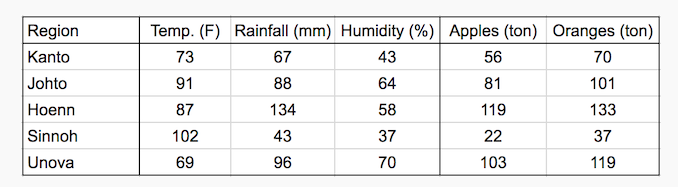
linear-regression-training-data

In a linear regression model, each target variable is estimated to be a weighted sum of the input variables, offset by some constant, known as a bias :

yield_apple  = w11 * temp + w12 * rainfall + w13 * humidity + b1

yield_orange = w21 * temp + w22 * rainfall + w23 * humidity + b2
Visually, it means that the yield of apples is a linear or planar function of temperature, rainfall and humidity:

linear-regression-graph
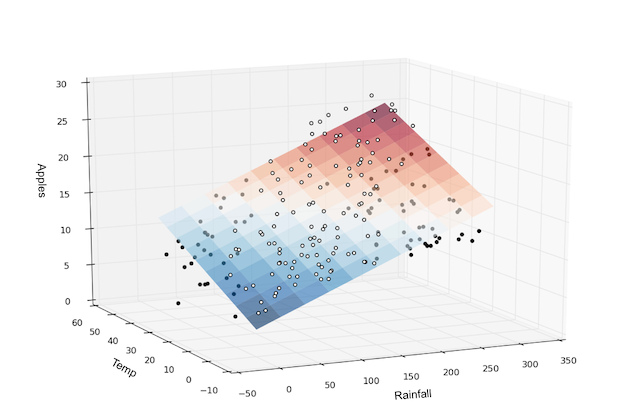
The learning part of linear regression is to figure out a set of weights w11, w12,... w23, b1 & b2 using the training data, to make accurate predictions for new data. The learned weights will be used to predict the yields for apples and oranges in a new region using the average temperature, rainfall, and humidity for that region.

We'll train our model by adjusting the weights slightly many times to make better predictions, using an optimization technique called gradient descent. Let's begin by importing Numpy and PyTorch.

In [ ]:
import numpy as np
import torch

Training data
We can represent the training data using two matrices: inputs and targets, each with one row per observation, and one column per variable.

In [ ]:
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43], 
                   [91, 88, 64], 
                   [87, 134, 58], 
                   [102, 43, 37], 
                   [69, 96, 70]], dtype='float32')

In [ ]:
# Targets (apples, oranges)
targets = np.array([[56, 70], 
                    [81, 101], 
                    [119, 133], 
                    [22, 37], 
                    [103, 119]], dtype='float32')

Let's convert the arrays to PyTorch tensors.

In [ ]:
# Convert inputs and targets to tensors
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)
print(inputs)
print(targets)

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])
tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


Linear regression model from scratch
The weights and biases (w11, w12,... w23, b1 & b2) can also be represented as matrices, initialized as random values. The first row of w and the first element of b are used to predict the first target variable, i.e., yield of apples, and similarly, the second for oranges.

In [ ]:
# Weights and biases
w = torch.randn(2, 3, requires_grad=True)
b = torch.randn(2, requires_grad=True)
print(w)
print(b)

tensor([[ 1.6152, -0.7971,  1.3020],
        [ 1.2139, -0.3640,  1.6498]], requires_grad=True)
tensor([0.8039, 0.9657], requires_grad=True)


torch.randn creates a tensor with the given shape, with elements picked randomly from a normal distribution with mean 0 and standard deviation 1.

Our model is simply a function that performs a matrix multiplication of the inputs and the weights w (transposed) and adds the bias b (replicated for each observation).

matrix-mult
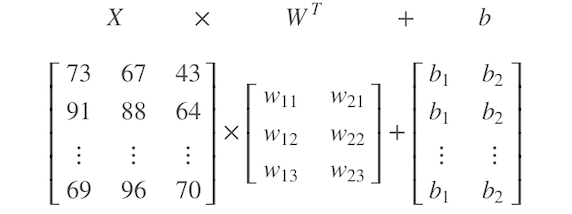


We can define the model as follows:

In [ ]:
def model(x):
    #print(w)
    #print(b)
    return x @ w.t() + b

In [ ]:
regu = torch.sum(w * w,0)
print(w)
print(w * w)
regu

tensor([[ 1.6152, -0.7971,  1.3020],
        [ 1.2139, -0.3640,  1.6498]], requires_grad=True)
tensor([[2.6089, 0.6354, 1.6952],
        [1.4736, 0.1325, 2.7217]], grad_fn=<MulBackward0>)


tensor([4.0826, 0.7679, 4.4169], grad_fn=<SumBackward1>)

@ represents matrix multiplication in PyTorch, and the .t method returns the transpose of a tensor.

The matrix obtained by passing the input data into the model is a set of predictions for the target variables.

In [ ]:
# Generate predictions
preds = model(inputs)
print(preds)

tensor([[121.2944, 136.1311],
        [160.9711, 184.9818],
        [110.0310, 153.4812],
        [179.4542, 170.1739],
        [126.8716, 165.2614]], grad_fn=<AddBackward0>)


Let's compare the predictions of our model with the actual targets.

In [ ]:
# Compare with targets
print(targets)

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


You can see a big difference between our model's predictions and the actual targets because we've initialized our model with random weights and biases. Obviously, we can't expect a randomly initialized model to just work.

Loss function
Before we improve our model, we need a way to evaluate how well our model is performing. We can compare the model's predictions with the actual targets using the following method:

Calculate the difference between the two matrices (preds and targets).
Square all elements of the difference matrix to remove negative values.
Calculate the average of the elements in the resulting matrix.
The result is a single number, known as the mean squared error (MSE).

In [ ]:
# MSE loss
def mse(t1, t2):
    diff = t1 - t2
    return torch.sum(diff * diff) / diff.numel()

torch.sum returns the sum of all the elements in a tensor. The .numel method of a tensor returns the number of elements in a tensor. Let's compute the mean squared error for the current predictions of our model.

In [ ]:
# Compute loss
loss = mse(preds, targets)
print(loss)

tensor(6782.2007, grad_fn=<DivBackward0>)


Here’s how we can interpret the result: On average, each element in the prediction differs from the actual target by the square root of the loss. And that’s pretty bad, considering the numbers we are trying to predict are themselves in the range 50–200. The result is called the loss because it indicates how bad the model is at predicting the target variables. It represents information loss in the model: the lower the loss, the better the model.

Compute gradients
With PyTorch, we can automatically compute the gradient or derivative of the loss w.r.t. to the weights and biases because they have requires_grad set to True. We'll see how this is useful in just a moment.

In [ ]:
# Compute gradients
loss.backward()

The gradients are stored in the .grad property of the respective tensors. Note that the derivative of the loss w.r.t. the weights matrix is itself a matrix with the same dimensions.

In [ ]:
# Gradients for weights
print(w)
print(w.grad)

tensor([[ 1.6152, -0.7971,  1.3020],
        [ 1.2139, -0.3640,  1.6498]], requires_grad=True)
tensor([[5794.2061, 3854.5088, 2980.4854],
        [6205.5103, 4946.6465, 3514.4221]])


Adjust weights and biases to reduce the loss
The loss is a quadratic function of our weights and biases, and our objective is to find the set of weights where the loss is the lowest. If we plot a graph of the loss w.r.t any individual weight or bias element, it will look like the figure shown below. An important insight from calculus is that the gradient indicates the rate of change of the loss, i.e., the loss function's slope w.r.t. the weights and biases.

If a gradient element is positive:

increasing the weight element's value slightly will increase the loss
decreasing the weight element's value slightly will decrease the loss
postive-gradient
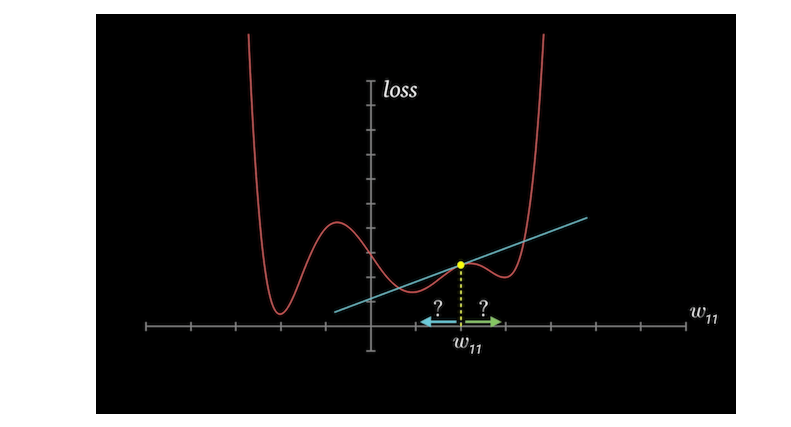
If a gradient element is negative:
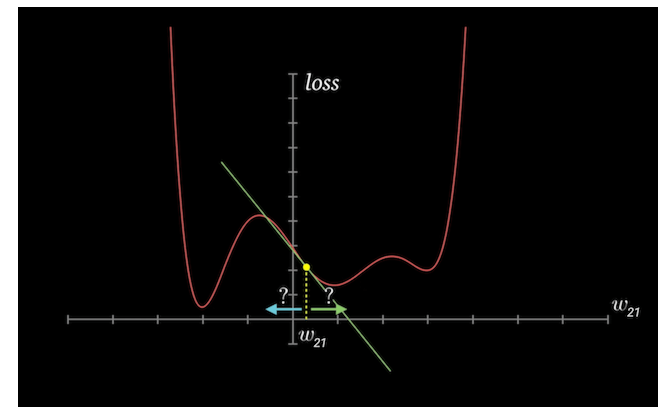
increasing the weight element's value slightly will decrease the loss
decreasing the weight element's value slightly will increase the loss
negative=gradient

The increase or decrease in the loss by changing a weight element is proportional to the gradient of the loss w.r.t. that element. This observation forms the basis of the gradient descent optimization algorithm that we'll use to improve our model (by descending along the gradient).

We can subtract from each weight element a small quantity proportional to the derivative of the loss w.r.t. that element to reduce the loss slightly.

In [ ]:
print(w)
print(w.grad)

tensor([[ 1.6152, -0.7971,  1.3020],
        [ 1.2139, -0.3640,  1.6498]], requires_grad=True)
tensor([[5794.2061, 3854.5088, 2980.4854],
        [6205.5103, 4946.6465, 3514.4221]])


In [ ]:
with torch.no_grad():
  w -= w.grad * 1e-5
  b -= b.grad * 1e-5

In [ ]:
print(w)
print(w.grad)

tensor([[ 1.5573, -0.8357,  1.2722],
        [ 1.1519, -0.4135,  1.6146]], requires_grad=True)
tensor([[5794.2061, 3854.5088, 2980.4854],
        [6205.5103, 4946.6465, 3514.4221]])


In [ ]:
with torch.no_grad():
    w -= w.grad * 1e-5
    b -= b.grad * 1e-5

We multiply the gradients with a very small number (10^-5 in this case) to ensure that we don't modify the weights by a very large amount. We want to take a small step in the downhill direction of the gradient, not a giant leap. This number is called the learning rate of the algorithm.

We use torch.no_grad to indicate to PyTorch that we shouldn't track, calculate, or modify gradients while updating the weights and biases.

In [ ]:
# Let's verify that the loss is actually lower
loss = mse(preds, targets)
print(loss)

tensor(6782.2007, grad_fn=<DivBackward0>)


Before we proceed, we reset the gradients to zero by invoking the .zero_() method. We need to do this because PyTorch accumulates gradients. Otherwise, the next time we invoke .backward on the loss, the new gradient values are added to the existing gradients, which may lead to unexpected results.

In [ ]:
w.grad.zero_()
b.grad.zero_()
print(w.grad)
print(b.grad)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([0., 0.])


Train the model using gradient descent
As seen above, we reduce the loss and improve our model using the gradient descent optimization algorithm. Thus, we can train the model using the following steps:

Generate predictions

Calculate the loss

Compute gradients w.r.t the weights and biases

Adjust the weights by subtracting a small quantity proportional to the gradient

Reset the gradients to zero

Let's implement the above step by step.

In [ ]:
# Generate predictions
preds = model(inputs)
print(preds)

tensor([[105.1053, 117.4188],
        [139.8254, 160.4818],
        [ 86.1604, 125.3485],
        [162.1123, 150.6584],
        [107.3010, 142.2786]], grad_fn=<AddBackward0>)


In [ ]:
# Calculate the loss
loss = mse(preds, targets)
print(loss)

tensor(4590.5479, grad_fn=<DivBackward0>)


In [ ]:
# Compute gradients
loss.backward()
print(w.grad)
print(b.grad)

tensor([[4133.7974, 2100.7832, 1891.3774],
        [4281.6235, 2901.6423, 2247.3838]])
tensor([43.9009, 47.2372])


Let's update the weights and biases using the gradients computed above.

In [ ]:
# Adjust weights & reset gradients
with torch.no_grad():
    w -= w.grad * 1e-5
    b -= b.grad * 1e-5
    w.grad.zero_()
    b.grad.zero_()

In [ ]:
print(w)
print(b)

tensor([[ 1.4580, -0.8952,  1.2235],
        [ 1.0470, -0.4920,  1.5570]], requires_grad=True)
tensor([0.8022, 0.9638], requires_grad=True)


With the new weights and biases, the model should have a lower loss.

In [ ]:
# Calculate loss
preds = model(inputs)
loss = mse(preds, targets)
print(loss)

tensor(4069.2747, grad_fn=<DivBackward0>)


We have already achieved a significant reduction in the loss merely by adjusting the weights and biases slightly using gradient descent.



Train for multiple epochs
To reduce the loss further, we can repeat the process of adjusting the weights and biases using the gradients multiple times. Each iteration is called an epoch. Let's train the model for 100 epochs.

In [ ]:
# Train for 100 epochs
for i in range(100):
    preds = model(inputs)
    loss = mse(preds, targets)
    loss.backward()
    with torch.no_grad():
        w -= w.grad * 1e-5
        b -= b.grad * 1e-5
        w.grad.zero_()
        b.grad.zero_()

Once again, let's verify that the loss is now lower:

In [ ]:
# Calculate loss
preds = model(inputs)
loss = mse(preds, targets)
print(loss)

tensor(890.0942, grad_fn=<DivBackward0>)


The loss is now much lower than its initial value. Let's look at the model's predictions and compare them with the targets.

In [ ]:
# Predictions
preds

tensor([[ 67.2103,  77.4690],
        [ 94.6068, 111.1285],
        [ 74.3453,  97.6652],
        [ 79.2588,  78.2656],
        [ 89.6987, 113.4485]], grad_fn=<AddBackward0>)

In [ ]:
# Targets
targets

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])

The predictions are now quite close to the target variables. We can get even better results by training for a few more epochs.

**Linear regression using PyTorch built-ins**

We've implemented linear regression & gradient descent model using some basic tensor operations. However, since this is a common pattern in deep learning, PyTorch provides several built-in functions and classes to make it easy to create and train models with just a few lines of code.

Let's begin by importing the torch.nn package from PyTorch, which contains utility classes for building neural networks

In [ ]:
import torch.nn as nn

As before, we represent the inputs and targets and matrices.

In [ ]:
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43], 
                   [91, 88, 64], 
                   [87, 134, 58], 
                   [102, 43, 37], 
                   [69, 96, 70], 
                   [74, 66, 43], 
                   [91, 87, 65], 
                   [88, 134, 59], 
                   [101, 44, 37], 
                   [68, 96, 71], 
                   [73, 66, 44], 
                   [92, 87, 64], 
                   [87, 135, 57], 
                   [103, 43, 36], 
                   [68, 97, 70]], 
                  dtype='float32')

# Targets (apples, oranges)
targets = np.array([[56, 70], 
                    [81, 101], 
                    [119, 133], 
                    [22, 37], 
                    [103, 119],
                    [57, 69], 
                    [80, 102], 
                    [118, 132], 
                    [21, 38], 
                    [104, 118], 
                    [57, 69], 
                    [82, 100], 
                    [118, 134], 
                    [20, 38], 
                    [102, 120]], 
                   dtype='float32')

inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

In [ ]:
inputs

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.],
        [ 74.,  66.,  43.],
        [ 91.,  87.,  65.],
        [ 88., 134.,  59.],
        [101.,  44.,  37.],
        [ 68.,  96.,  71.],
        [ 73.,  66.,  44.],
        [ 92.,  87.,  64.],
        [ 87., 135.,  57.],
        [103.,  43.,  36.],
        [ 68.,  97.,  70.]])

We are using 15 training examples to illustrate how to work with large datasets in small batches.

**Dataset and DataLoader**
We'll create a TensorDataset, which allows access to rows from inputs and targets as tuples, and provides standard APIs for working with many different types of datasets in PyTorch.

In [ ]:
from torch.utils.data import TensorDataset


In [ ]:
# Define dataset
train_ds = TensorDataset(inputs, targets)
train_ds[0:3]

(tensor([[ 73.,  67.,  43.],
         [ 91.,  88.,  64.],
         [ 87., 134.,  58.]]), tensor([[ 56.,  70.],
         [ 81., 101.],
         [119., 133.]]))

In [ ]:
print(train_ds[0][0])
print(train_ds[0][1])


tensor([73., 67., 43.])
tensor([56., 70.])


https://www.datacamp.com/community/tutorials/python-tuples-tutorial?utm_source=adwords_ppc&utm_campaignid=1455363063&utm_adgroupid=65083631748&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=&utm_creative=332602034358&utm_targetid=aud-517318242147:dsa-429603003980&utm_loc_interest_ms=&utm_loc_physical_ms=1011086&gclid=Cj0KCQjwyN-DBhCDARIsAFOELTlTLK5I7O1kV6LzS6NBqmMe9ljaVwNJZOCJNUvAEaXqCsVxxfu8eQ4aApJaEALw_wcB


In [ ]:
#print(train_ds.dtype)
dumA, dumB = train_ds[0:3]
print(dumA)
print(dumB)

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.]])
tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.]])


The TensorDataset allows us to access a small section of the training data using the array indexing notation ([0:3] in the above code). It returns a tuple with two elements. The first element contains the input variables for the selected rows, and the second contains the targets.

We'll also create a DataLoader, which can split the data into batches of a predefined size while training. It also provides other utilities like shuffling and random sampling of the data.

In [ ]:
from torch.utils.data import DataLoader

In [ ]:
# Define data loader
batch_size = 5
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

We can use the data loader in a for loop. Let's look at an example.

In [ ]:
#print(train_dl.dtype)

In [ ]:
for xb, yb in train_dl:
    print(xb)
    print(yb)
    print(xb[0][0])
    print(xb[0][1])
    break

tensor([[ 73.,  67.,  43.],
        [ 73.,  66.,  44.],
        [ 69.,  96.,  70.],
        [ 87., 134.,  58.],
        [ 74.,  66.,  43.]])
tensor([[ 56.,  70.],
        [ 57.,  69.],
        [103., 119.],
        [119., 133.],
        [ 57.,  69.]])
tensor(73.)
tensor(67.)


In each iteration, the data loader returns one batch of data with the given batch size. If shuffle is set to True, it shuffles the training data before creating batches. Shuffling helps randomize the input to the optimization algorithm, leading to a faster reduction in the loss.

In [ ]:
#print(train_dl[0])

**nn.Linear**
Instead of initializing the weights & biases manually, we can define the model using the nn.Linear class from PyTorch, which does it automatically.
https://pytorch.org/docs/stable/generated/torch.nn.Linear.html


In [ ]:
#help(nn.Linear)

In [ ]:
# Define model
model = nn.Linear(3, 2)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[-0.0279, -0.0346,  0.1512],
        [-0.1639, -0.4716, -0.0645]], requires_grad=True)
Parameter containing:
tensor([-0.5117,  0.3881], requires_grad=True)


PyTorch models also have a helpful .parameters method, which returns a list containing all the weights and bias matrices present in the model. For our linear regression model, we have one weight matrix and one bias matrix.

In [ ]:
# Parameters
list(model.parameters())

[Parameter containing:
 tensor([[-0.0279, -0.0346,  0.1512],
         [-0.1639, -0.4716, -0.0645]], requires_grad=True),
 Parameter containing:
 tensor([-0.5117,  0.3881], requires_grad=True)]

We can use the model to generate predictions in the same way as before.


In [ ]:
# Generate predictions
preds = model(inputs)
preds

tensor([[  1.6319, -45.9472],
        [  3.5777, -60.1552],
        [  1.1883, -80.8051],
        [  0.7461, -38.9964],
        [  4.8223, -60.7083],
        [  1.6386, -45.6396],
        [  3.7636, -59.7481],
        [  1.3116, -81.0336],
        [  0.7393, -39.3041],
        [  5.0015, -60.6088],
        [  1.8177, -45.5401],
        [  3.5844, -59.8476],
        [  1.0024, -81.2122],
        [  0.5669, -39.0959],
        [  4.8156, -61.0159]], grad_fn=<AddmmBackward0>)

**Loss Function**
Instead of defining a loss function manually, we can use the built-in loss function mse_loss.

Instead of defining a loss function manually, we can use the built-in loss function mse_loss.

In [ ]:
# Import nn.functional
import torch.nn.functional as F

The nn.functional package contains many useful loss functions and several other utilities.

In [ ]:
# Define loss function
loss_fn = F.mse_loss

Let's compute the loss for the current predictions of our model.

In [ ]:
loss = loss_fn(model(inputs), targets)
print(loss)

tensor(15593.0020, grad_fn=<MseLossBackward0>)


**Optimizer**
Instead of manually manipulating the model's weights & biases using gradients, we can use the optimizer optim.SGD. SGD is short for "stochastic gradient descent". The term stochastic indicates that samples are selected in random batches instead of as a single group.

In [ ]:
# Define optimizer
opt = torch.optim.SGD(model.parameters(), lr=1e-5)

Note that model.parameters() is passed as an argument to optim.SGD so that the optimizer knows which matrices should be modified during the update step. Also, we can specify a learning rate that controls the amount by which the parameters are modified.

Train the model
We are now ready to train the model. We'll follow the same process to implement gradient descent:

Generate predictions

Calculate the loss

Compute gradients w.r.t the weights and biases

Adjust the weights by subtracting a small quantity proportional to the gradient

Reset the gradients to zero

The only change is that we'll work batches of data instead of processing the entire training data in every iteration. Let's define a utility function fit that trains the model for a given number of epochs.

In [ ]:
# Utility function to train the model
def fit(num_epochs, model, loss_fn, opt, train_dl):
    
    # Repeat for given number of epochs
    for epoch in range(num_epochs):
        
        # Train with batches of data
        for xb,yb in train_dl:
            
            # 1. Generate predictions
            pred = model(xb)
            
            # 2. Calculate loss
            loss = loss_fn(pred, yb)
            
            # 3. Compute gradients
            loss.backward()
            
            # 4. Update parameters using gradients
            opt.step()
            
            # 5. Reset the gradients to zero
            opt.zero_grad()
        
        # Print the progress
        if (epoch+1) % 10 == 0:
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

Some things to note above:

We use the data loader defined earlier to get batches of data for every iteration.

Instead of updating parameters (weights and biases) manually, we use opt.step to perform the update and opt.zero_grad to reset the gradients to zero.

We've also added a log statement that prints the loss from the last batch of data for every 10th epoch to track training progress. loss.item returns the actual value stored in the loss tensor.

Let's train the model for 100 epochs.

In [ ]:
fit(100, model, loss_fn, opt, train_dl)

Epoch [10/100], Loss: 414.5095
Epoch [20/100], Loss: 71.7655
Epoch [30/100], Loss: 333.8706
Epoch [40/100], Loss: 110.4937
Epoch [50/100], Loss: 100.7471
Epoch [60/100], Loss: 44.4905
Epoch [70/100], Loss: 45.0642
Epoch [80/100], Loss: 58.8640
Epoch [90/100], Loss: 39.6377
Epoch [100/100], Loss: 21.5281


Let's generate predictions using our model and verify that they're close to our targets.

In [ ]:
# Generate predictions
preds = model(inputs)
preds


tensor([[ 58.0062,  71.8284],
        [ 81.5085,  99.1700],
        [117.5774, 133.6255],
        [ 27.4116,  45.4511],
        [ 97.0084, 111.7045],
        [ 56.9151,  70.8992],
        [ 81.1957,  98.9389],
        [117.8305, 134.0959],
        [ 28.5027,  46.3804],
        [ 97.7867, 112.4026],
        [ 57.6934,  71.5974],
        [ 80.4174,  98.2407],
        [117.8902, 133.8566],
        [ 26.6333,  44.7530],
        [ 98.0995, 112.6337]], grad_fn=<AddmmBackward0>)

In [ ]:
# Compare with targets
targets

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 57.,  69.],
        [ 80., 102.],
        [118., 132.],
        [ 21.,  38.],
        [104., 118.],
        [ 57.,  69.],
        [ 82., 100.],
        [118., 134.],
        [ 20.,  38.],
        [102., 120.]])

Indeed, the predictions are quite close to our targets. We have a trained a reasonably good model to predict crop yields for apples and oranges by looking at the average temperature, rainfall, and humidity in a region. We can use it to make predictions of crop yields for new regions by passing a batch containing a single row of input.

In [ ]:
model(torch.tensor([[75, 63, 44.]]))

tensor([[54.6826, 68.9235]], grad_fn=<AddmmBackward0>)

The predicted yield of apples is 54.3 tons per hectare, and that of oranges is 68.3 tons per hectare.